# AudioSet models
Single predictor models using AudioSet regressors for auditory object recognition

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools.create import create_single_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor, plot_regressor,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [3]:
api = Neuroscout()

## Define predictors and confounds

In [4]:
predictors = ["as-Animal", "as-Music", "as-Whistling", "as-Vehicle", "as-Silence", "as-Tools", "as-Noise", "as-Water", "as-Wind", "as-Hands", "as-Wood"]
control = ['rms']

In [5]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05',  'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

In [6]:
transformations = [{"Name": "Scale", 
                    "Demean": True, 
                    "Rescale": True,
                    "ReplaceNA": "after", 
                    "Input": ["rms"]}]

## Create models

In [7]:
single_models = create_single_models(predictors, confounds, control=control, transformations=transformations)

In [8]:
filename = Path('models') / 'audioset_rms.json'

In [9]:
dump_collection(single_models, filename)

In [10]:
single_models = load_collection(filename)

### Reports

In [16]:
for (pred, dataset, task), model in flatten_collection(single_models):
    model.generate_report(run_id=model.runs[0])

In [ ]:
for p in predictors:
    single_models[p]['Raiders']['raiders'].plot_report()

## Inspect regressors

In [20]:
df = _extract_regressors(single_models, dataset=['Sherlock'])

TypeError: _extract_regressors() got an unexpected keyword argument 'dataset'

In [ ]:
plot_regressor('distribution', df=df, dataset='Sherlock', split_by='hue', color=None, aspect=3, hist=None, rug=True)

In [ ]:
plot_regressor('timeseries', df=df, dataset='Sherlock', split_by='row', height=1.2, aspect=10)

In [12]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

In [ ]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'],
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [21]:
for (pred, dataset, task), model in flatten_collection(single_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'Status: {model.status} for {pred}, {dataset}, {task}')

Status: PASSED for as-Animal, HealthyBrainNetwork, movieDM
Status: PASSED for as-Animal, LearningTemporalStructure, movie
Status: PASSED for as-Animal, Life, life
Status: PASSED for as-Animal, ParanoiaStory, story
Status: PASSED for as-Animal, Raiders, raiders
Status: PASSED for as-Animal, SchematicNarrative, perception
Status: PASSED for as-Animal, Sherlock, sherlockPart1
Status: PASSED for as-Animal, SherlockMerlin, MerlinMovie
Status: PASSED for as-Animal, SherlockMerlin, SherlockMovie
Status: PASSED for as-Animal, studyforrest, movie
Status: PASSED for as-Hands, HealthyBrainNetwork, movieDM
Status: PASSED for as-Hands, LearningTemporalStructure, movie
Status: PASSED for as-Hands, Life, life
Status: PASSED for as-Hands, ParanoiaStory, story
Status: PASSED for as-Hands, Raiders, raiders
Status: PASSED for as-Hands, SchematicNarrative, perception
Status: PASSED for as-Hands, Sherlock, sherlockPart1
Status: PASSED for as-Hands, SherlockMerlin, MerlinMovie
Status: PASSED for as-Hands, S

In [22]:
' '.join([model.hash_id for (pred, dataset, task), model in flatten_collection(single_models)])

'Ma4l3 9eyYz wkVoJ M4jL5 97p4d wjNK3 A25a3 MNQOL M557X 9L2Vr AVjnB AqQK5 AbqNv MnkDa MXjEG A13WQ wWyWp 9Ed3m MGvBk wOOda AZ4ka wl8rz wy2qZ MRaWG MpDV3 Mv3W5 wgyDz MPqba A6okX Mm3zq wkVn1 MpDa5 M553j 9ey8d MNQ7V M4jJ7 AZ43k Mv322 Mm3EB A25l8 wK2ax MXjxG AdRdD M8vDg MzQZP AopqK AVjPB A136Q wOOka ArqLE Abqrv 97pBN MGvWk AqQj5 9Edbm MnkGa Ma4oz wjNbq 9L2jQ wWylp A6oYv w0gZ1 M37xv AYyJz wJ3qG wl8Wy 9Bq1v MD1XN wQD2q AxB5B wy2ep AYyGz A6ojv wl8Yy MPqP4 MRaNy AxB1B wJ30G M37Gv wgy1L AxBGa Aop8D 9BqBl MD1Q7 AYy7J wJ3dW wQDnR w0gGB wK286 M37jj 9Bqlv M8v7g wK2Kx AopQK w0gn1 MD1JN ArqoE MzQXP AdReD wQDVq Ma42z 9eyZd wkV31 M4jq7 97pLN wjNJq A25E8 MNQzV M55aj 9L2oQ'

## Results

In [10]:
flat_models = flatten_collection(single_models)

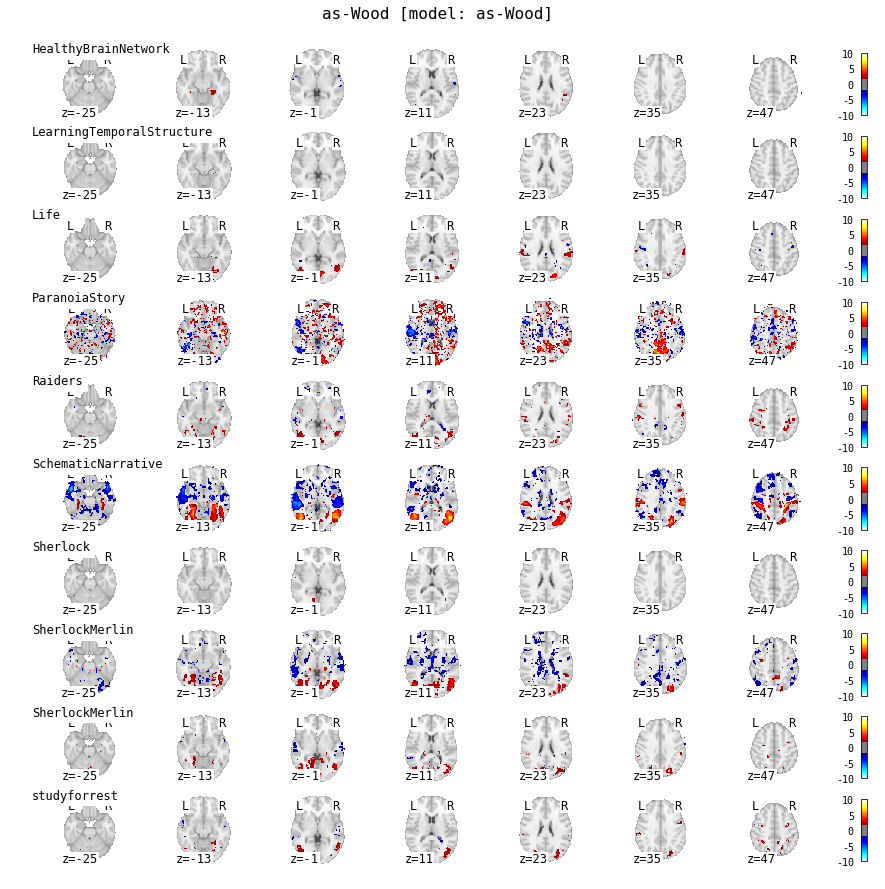

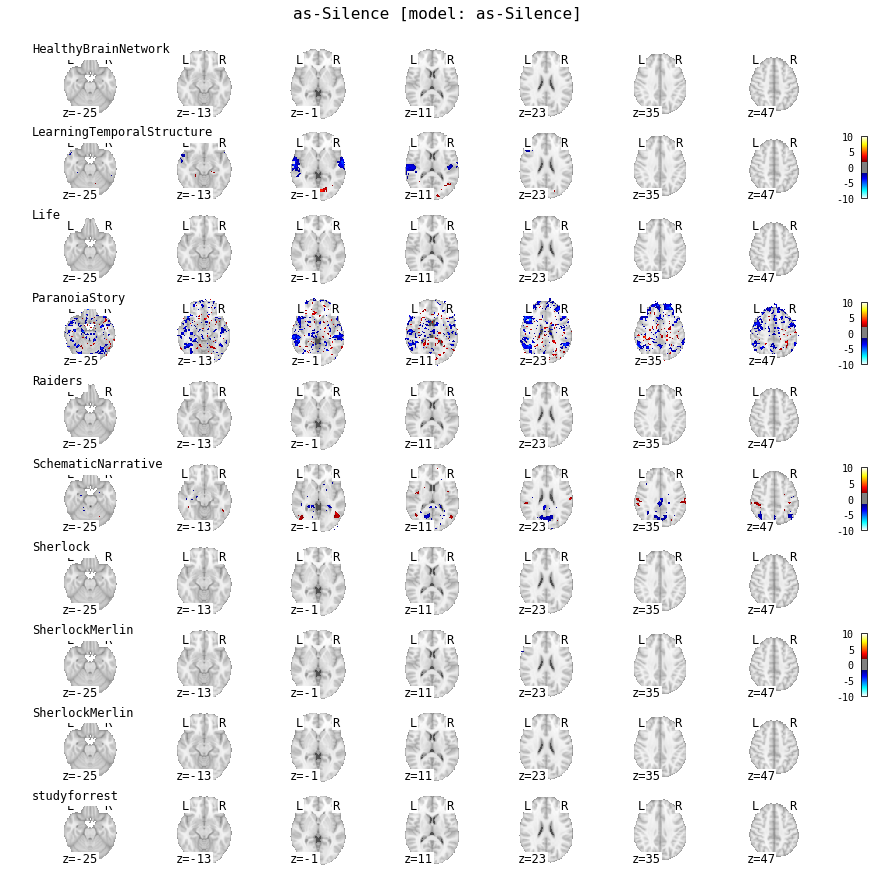

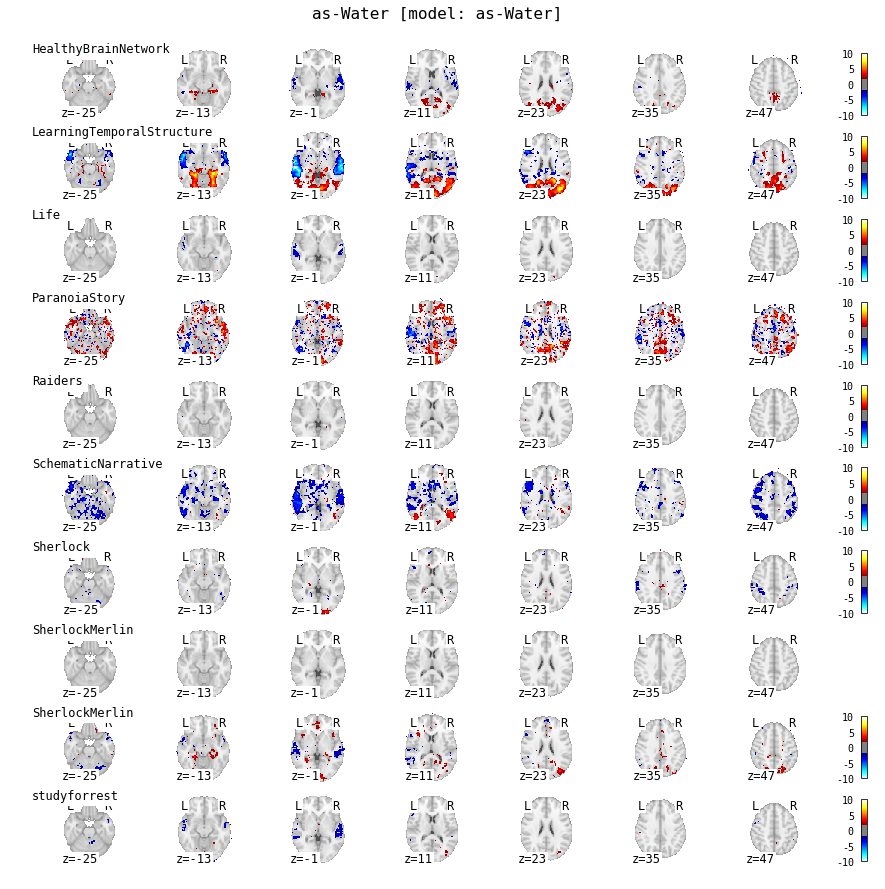

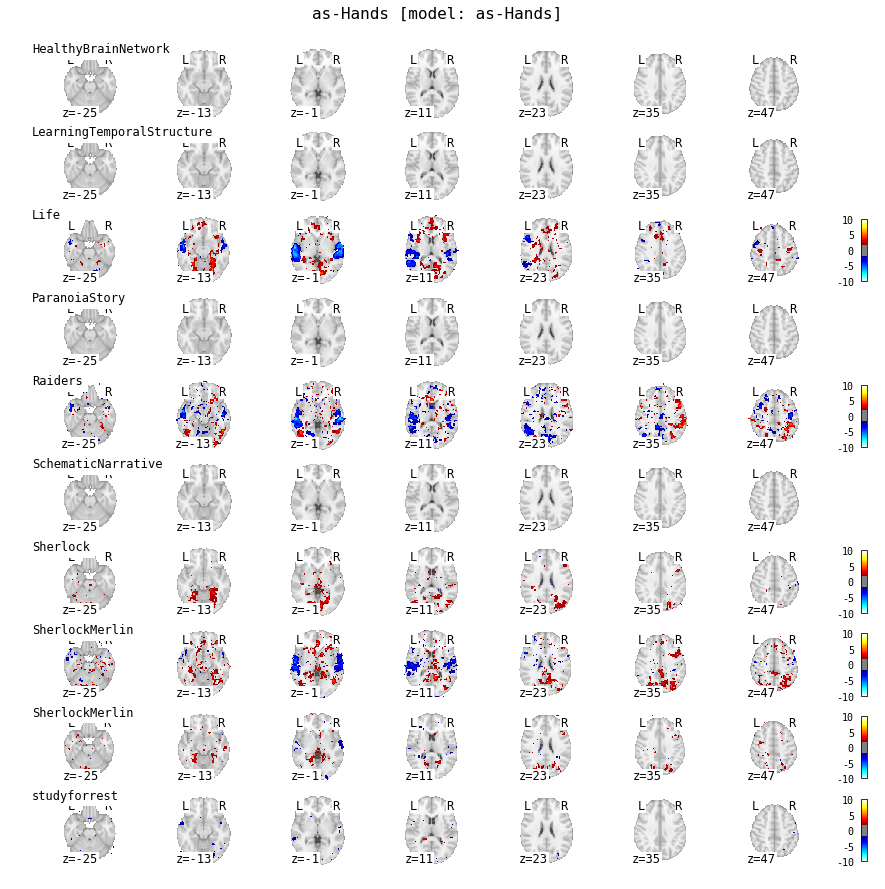

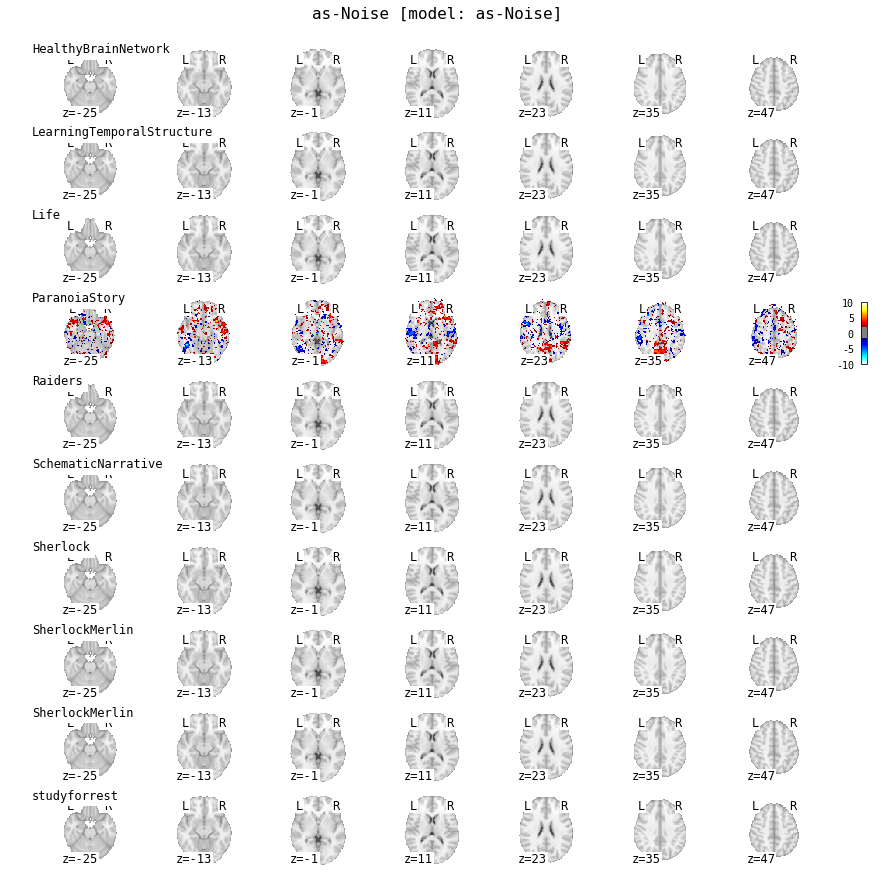

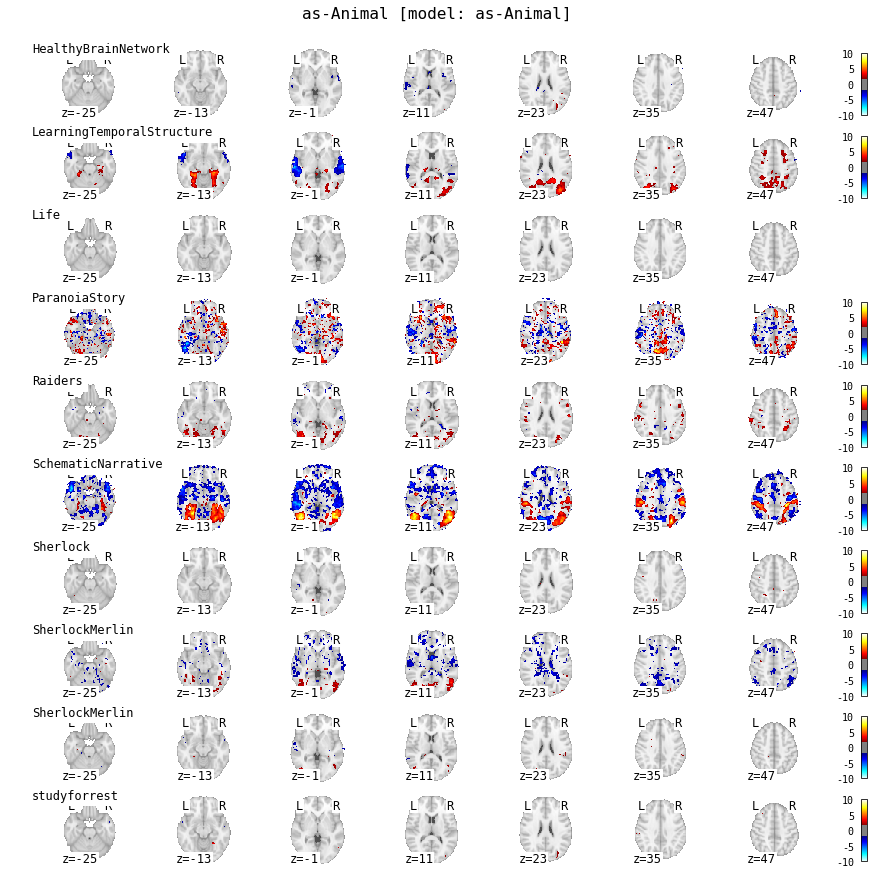

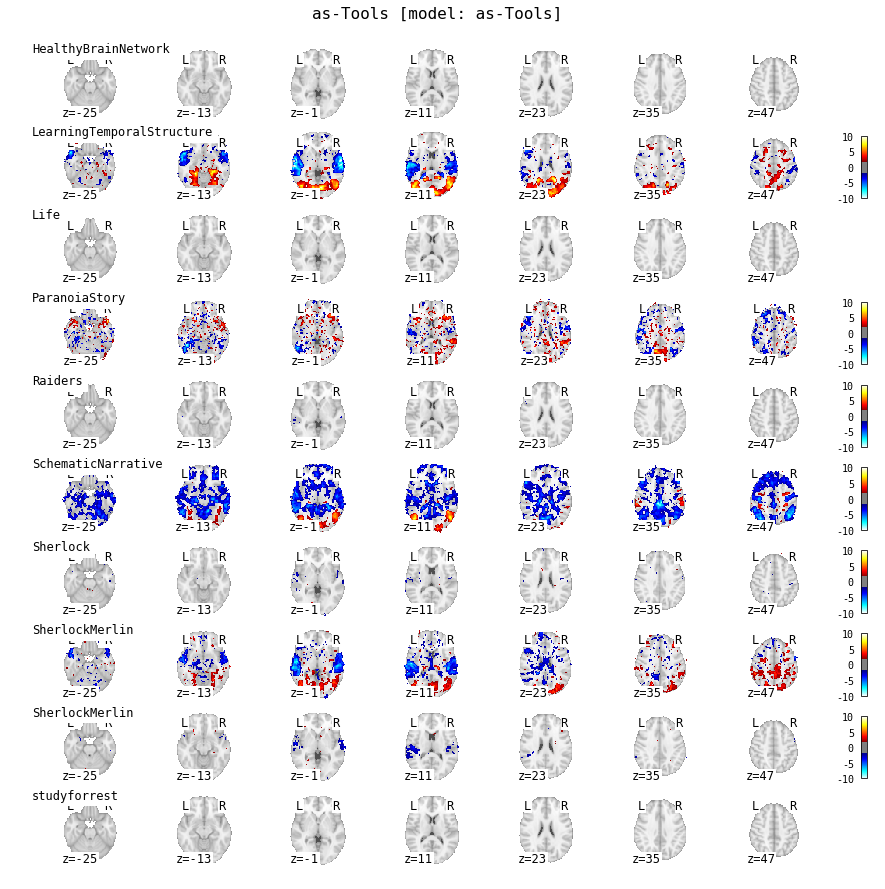

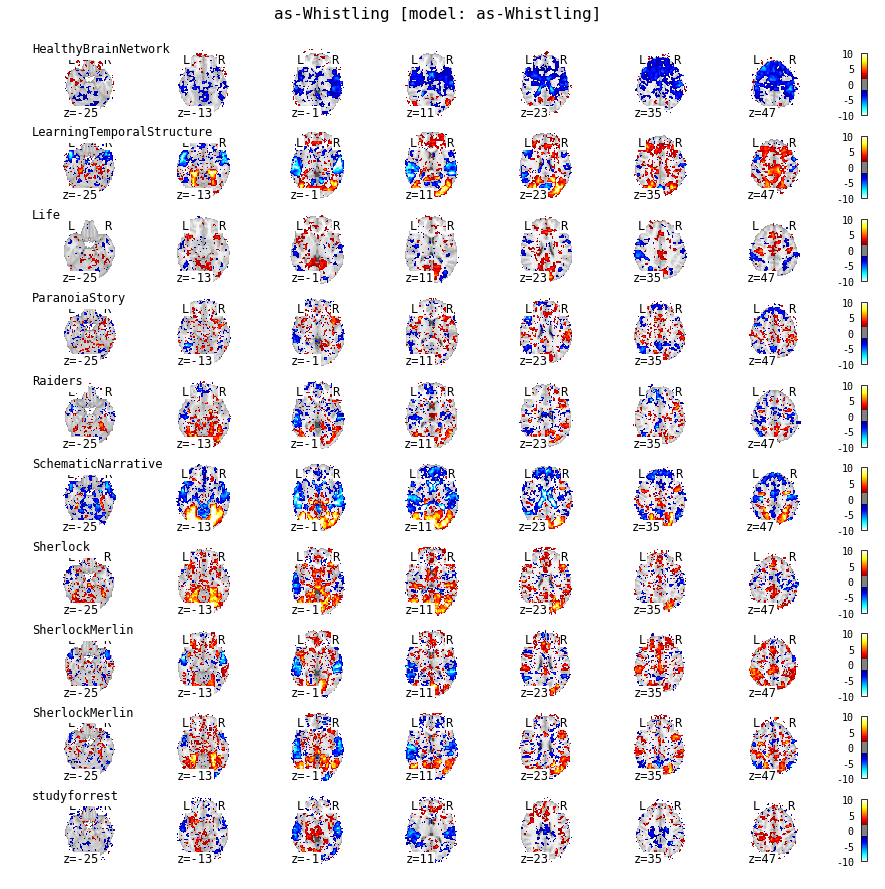

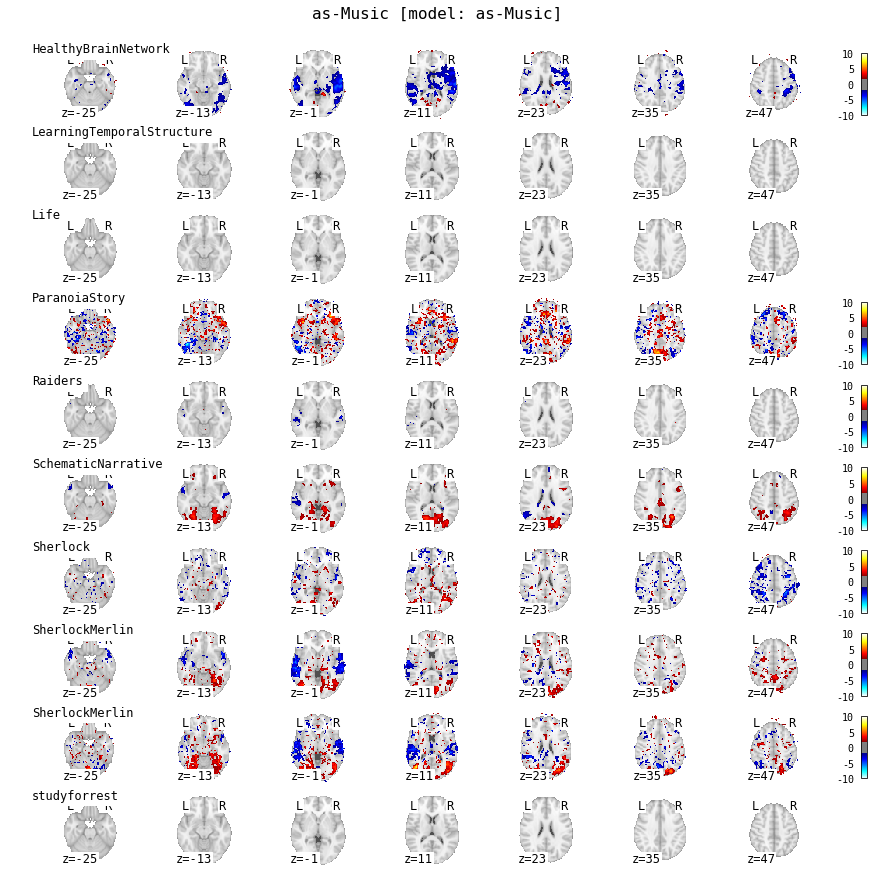

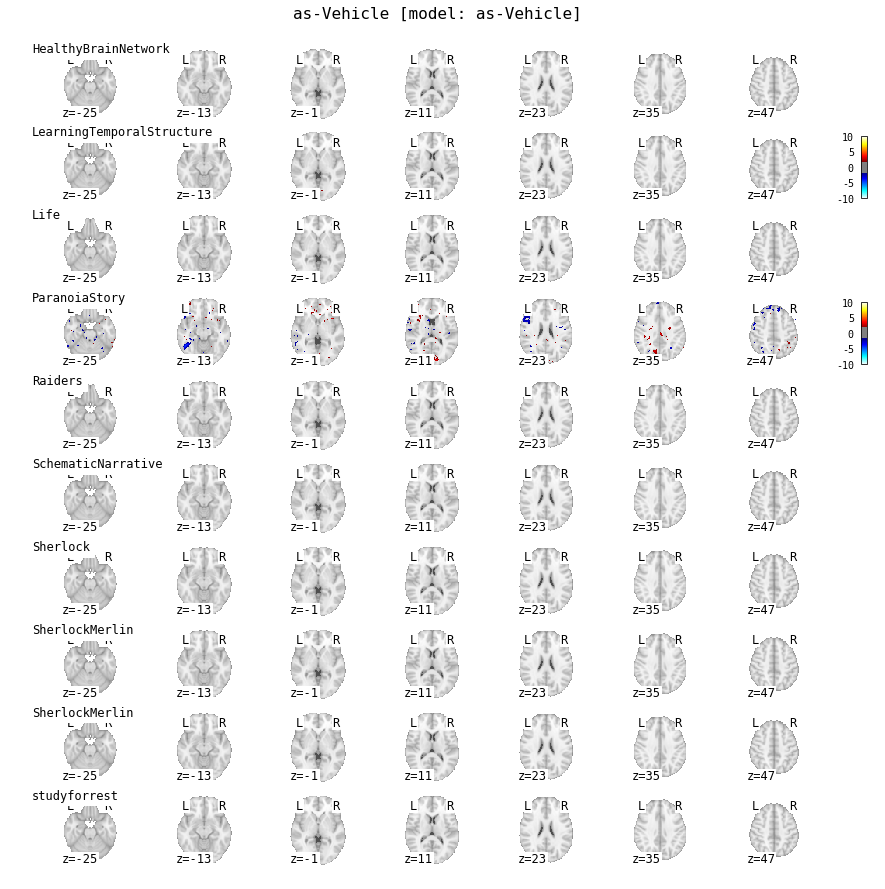

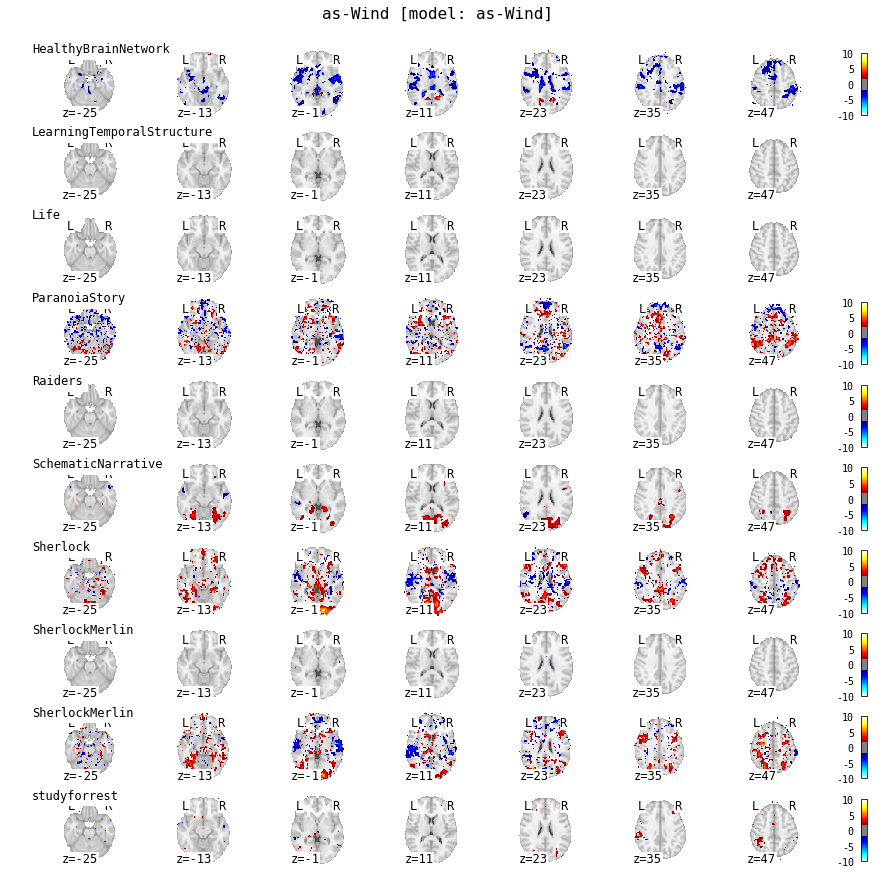

In [13]:
import warnings; warnings.simplefilter('ignore')
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(flat_models,
                          contrasts=predictors,
                          vmax=10, draw_cross=True, 
                          figsize=(15,15), colorbar=True, threshold=1.96)